In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Linear Regression Example

In [2]:
data = pd.read_csv("weatherHistory.csv")

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
data["Precip Type"].mode()[0] 

'rain'

In [7]:
data["Precip Type"] = data["Precip Type"].fillna(data["Precip Type"].mode()[0]) 

In [8]:
data.isna().sum() 

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [9]:
data["Formatted Date"] = pd.to_datetime(data["Formatted Date"], format = "%Y-%m-%d %H:%M:%S.%f %z") 

In [10]:
data = data.drop(["Loud Cover","Daily Summary"], axis=1) 

In [11]:
data = data.drop(["Apparent Temperature (C)"], axis=1) 

In [12]:
data = data.drop(["Formatted Date"], axis=1)

In [13]:
data.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [14]:
encoder = preprocessing.LabelEncoder()

In [15]:
encoder.fit(data["Summary"])

LabelEncoder()

In [16]:
list(encoder.classes_)

['Breezy',
 'Breezy and Dry',
 'Breezy and Foggy',
 'Breezy and Mostly Cloudy',
 'Breezy and Overcast',
 'Breezy and Partly Cloudy',
 'Clear',
 'Dangerously Windy and Partly Cloudy',
 'Drizzle',
 'Dry',
 'Dry and Mostly Cloudy',
 'Dry and Partly Cloudy',
 'Foggy',
 'Humid and Mostly Cloudy',
 'Humid and Overcast',
 'Humid and Partly Cloudy',
 'Light Rain',
 'Mostly Cloudy',
 'Overcast',
 'Partly Cloudy',
 'Rain',
 'Windy',
 'Windy and Dry',
 'Windy and Foggy',
 'Windy and Mostly Cloudy',
 'Windy and Overcast',
 'Windy and Partly Cloudy']

In [17]:
data["Summary"] = encoder.transform(data["Summary"])

In [18]:
encoder.fit(data["Precip Type"])
data["Precip Type"] = encoder.transform(data["Precip Type"])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
Summary                   96453 non-null int64
Precip Type               96453 non-null int64
Temperature (C)           96453 non-null float64
Humidity                  96453 non-null float64
Wind Speed (km/h)         96453 non-null float64
Wind Bearing (degrees)    96453 non-null float64
Visibility (km)           96453 non-null float64
Pressure (millibars)      96453 non-null float64
dtypes: float64(6), int64(2)
memory usage: 5.9 MB


In [20]:
y = data["Temperature (C)"]
x = data.drop(["Temperature (C)"], axis = 1)
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [22]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [23]:
print(reg.coef_, reg.intercept_)

[ 0.29764465 -4.00342993 -5.12765076 -1.44389942  0.25724021  0.70054224
 -0.13354495] 11.922053740200209


In [24]:
lin_rmse = np.sqrt(mean_squared_error(y_test, reg.predict(x_test)))
lin_rmse

5.968472205411863

In [25]:
weight_linear = {'index': ['Intercept','Summary', 'Precip Type', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
          'weights':[11.9, 0.3, -4.0, -5.1, -1.4,  0.3,  0.7,
 -0.1] }

In [26]:
weight_linear = pd.DataFrame(weight_linear)

In [27]:
weight_linear

,index,weights
0,Intercept,11.9
1,Summary,0.3
2,Precip Type,-4.0
3,Humidity,-5.1
4,Wind Speed (km/h),-1.4
5,Wind Bearing (degrees),0.3
6,Visibility (km),0.7
7,Pressure (millibars),-0.1


In [28]:
lasso = Lasso()
lasso.fit(x_train, y_train)
print(lasso.coef_, lasso.intercept_)

[ 0.         -3.33957414 -4.21999107 -0.10947681  0.          0.15655397
 -0.        ] 11.920693777908378


In [29]:
weight_lasso = {'index': ['Intercept','Summary', 'Precip Type', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
          'weights':[11.9, 0, -3.3, -4.2, -0.1, 0,  0.2,
 0] }

In [30]:
weight_lasso = pd.DataFrame(weight_lasso)

In [31]:
weight_lasso

,index,weights
0,Intercept,11.9
1,Summary,0.0
2,Precip Type,-3.3
3,Humidity,-4.2
4,Wind Speed (km/h),-0.1
5,Wind Bearing (degrees),0.0
6,Visibility (km),0.2
7,Pressure (millibars),0.0


# Logistic Regression Example

In [32]:
candy = pd.read_csv('candy-data.csv')
candy = candy.dropna()

In [33]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [34]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 9.3+ KB


In [35]:
dt = candy.copy()
dt.drop('competitorname', axis=1, inplace=True)

In [36]:
y = dt['chocolate']
dt.drop(['chocolate'], axis=1, inplace=True)

In [37]:
dt.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [38]:
X_train, X_test, y_train, y_test = train_test_split(dt, y, test_size=0.2,random_state=1)

In [39]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 0.9411764705882353


In [40]:
weight_coef = np.array(model.coef_).reshape(-1)
weight_inter = np.array(model.intercept_)

In [41]:
odd_coef = np.exp(weight_coef)
odd_inter = np.exp(weight_inter)

In [42]:
index = np.array(dt.columns)

In [43]:
index = np.concatenate((['Intercept'], index), axis=0)
weights = np.concatenate((weight_inter, weight_coef), axis=0)
odds = np.concatenate((odd_inter, odd_coef), axis=0)
weights = weights.round(decimals=2)
odds = odds.round(decimals=2)

In [44]:
weight_rige = {'index': index, 'weights': weights, 'odds ratio': odds}

In [45]:
weight_rige = pd.DataFrame(weight_rige)
weight_rige

,index,weights,odds ratio
0,Intercept,-5.12,0.01
1,fruity,-2.27,0.10
2,caramel,-0.07,0.93
3,peanutyalmondy,-0.04,0.96
4,nougat,-0.32,0.72
5,crispedricewafer,0.19,1.21
6,hard,-0.11,0.90
7,bar,0.70,2.02
8,pluribus,-0.29,0.75
9,sugarpercent,-0.44,0.64


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [47]:
decisionT = DecisionTreeClassifier()
decisionT = decisionT.fit(X_train,y_train)
y_pred = decisionT.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8235294117647058


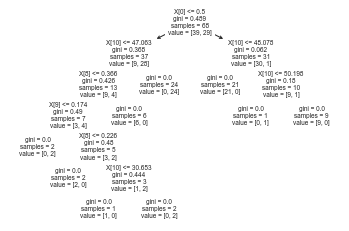

In [49]:
tree.plot_tree(decisionT);

In [50]:
decisionT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
decisionT = decisionT.fit(X_train,y_train)
y_pred = decisionT.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8235294117647058


In [51]:
tree.export_graphviz(decisionT, out_file='tree.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent' ]   ,class_names=['0','1'])

